In [1]:
from cpclasses import *

In [5]:
data = np.load('clusters_with_atomic_labels.npz')
for key in data:
    print(key, end='')
    if isinstance(data[key],np.ndarray):
        print(f", data['{key}'].shape =",data[key].shape, end='')
    print('')

positions, data['positions'].shape = (1000, 12, 2)
labels, data['labels'].shape = (1000, 12)


In [8]:
positions = data['positions']
labels = data['labels']
positions[:2],labels[:2]

(array([[[-0.00332433, -1.02447058],
         [-0.95821533, -3.04984458],
         [-0.36552233,  0.53756142],
         [-0.90157033,  2.11967042],
         [-0.15009633,  1.49755842],
         [ 0.55398667,  0.83476942],
         [ 1.27043767,  0.15255342],
         [ 0.97023767, -0.80353458],
         [ 0.33025167, -0.11268058],
         [ 1.62466167, -1.50849658],
         [-1.10184933,  1.16187642],
         [-1.26899733,  0.19503742]],
 
        [[-1.80177542, -0.817828  ],
         [-2.14286142,  1.137074  ],
         [ 1.24554758,  0.902375  ],
         [-0.15812742, -1.252931  ],
         [-0.63311742,  0.390825  ],
         [-0.86916842, -0.569556  ],
         [ 1.69522958, -0.721211  ],
         [ 0.53575158,  1.594886  ],
         [ 0.30547558,  0.641176  ],
         [ 0.99992158, -0.036758  ],
         [ 0.05781658, -0.294438  ],
         [ 0.76530758, -0.973614  ]]]),
 array([[False,  True, False,  True, False, False, False, False, False,
          True, False, False],
   

[(-5.0, 5.0), (-5.0, 5.0), None]

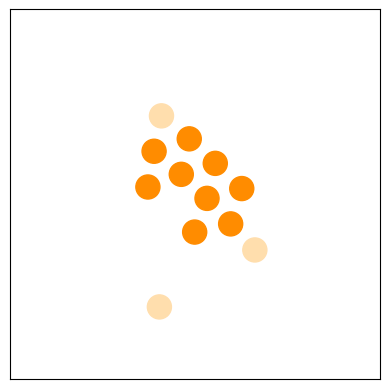

In [69]:
def draw_molecule(ax,positions,labels):

    colors = np.where(labels, 'navajowhite', 'darkorange')
    ax.scatter(positions[:,0],positions[:,1],c=colors, s = 300)
    ax.set(xlim=(-5,5),ylim=(-5,5),aspect='equal', xticks=[], yticks=[])


fig, ax = plt.subplots()
draw_molecule(ax,positions[0],labels[0])
ax.set(xlim=(-5,5),ylim=(-5,5),aspect='equal') 


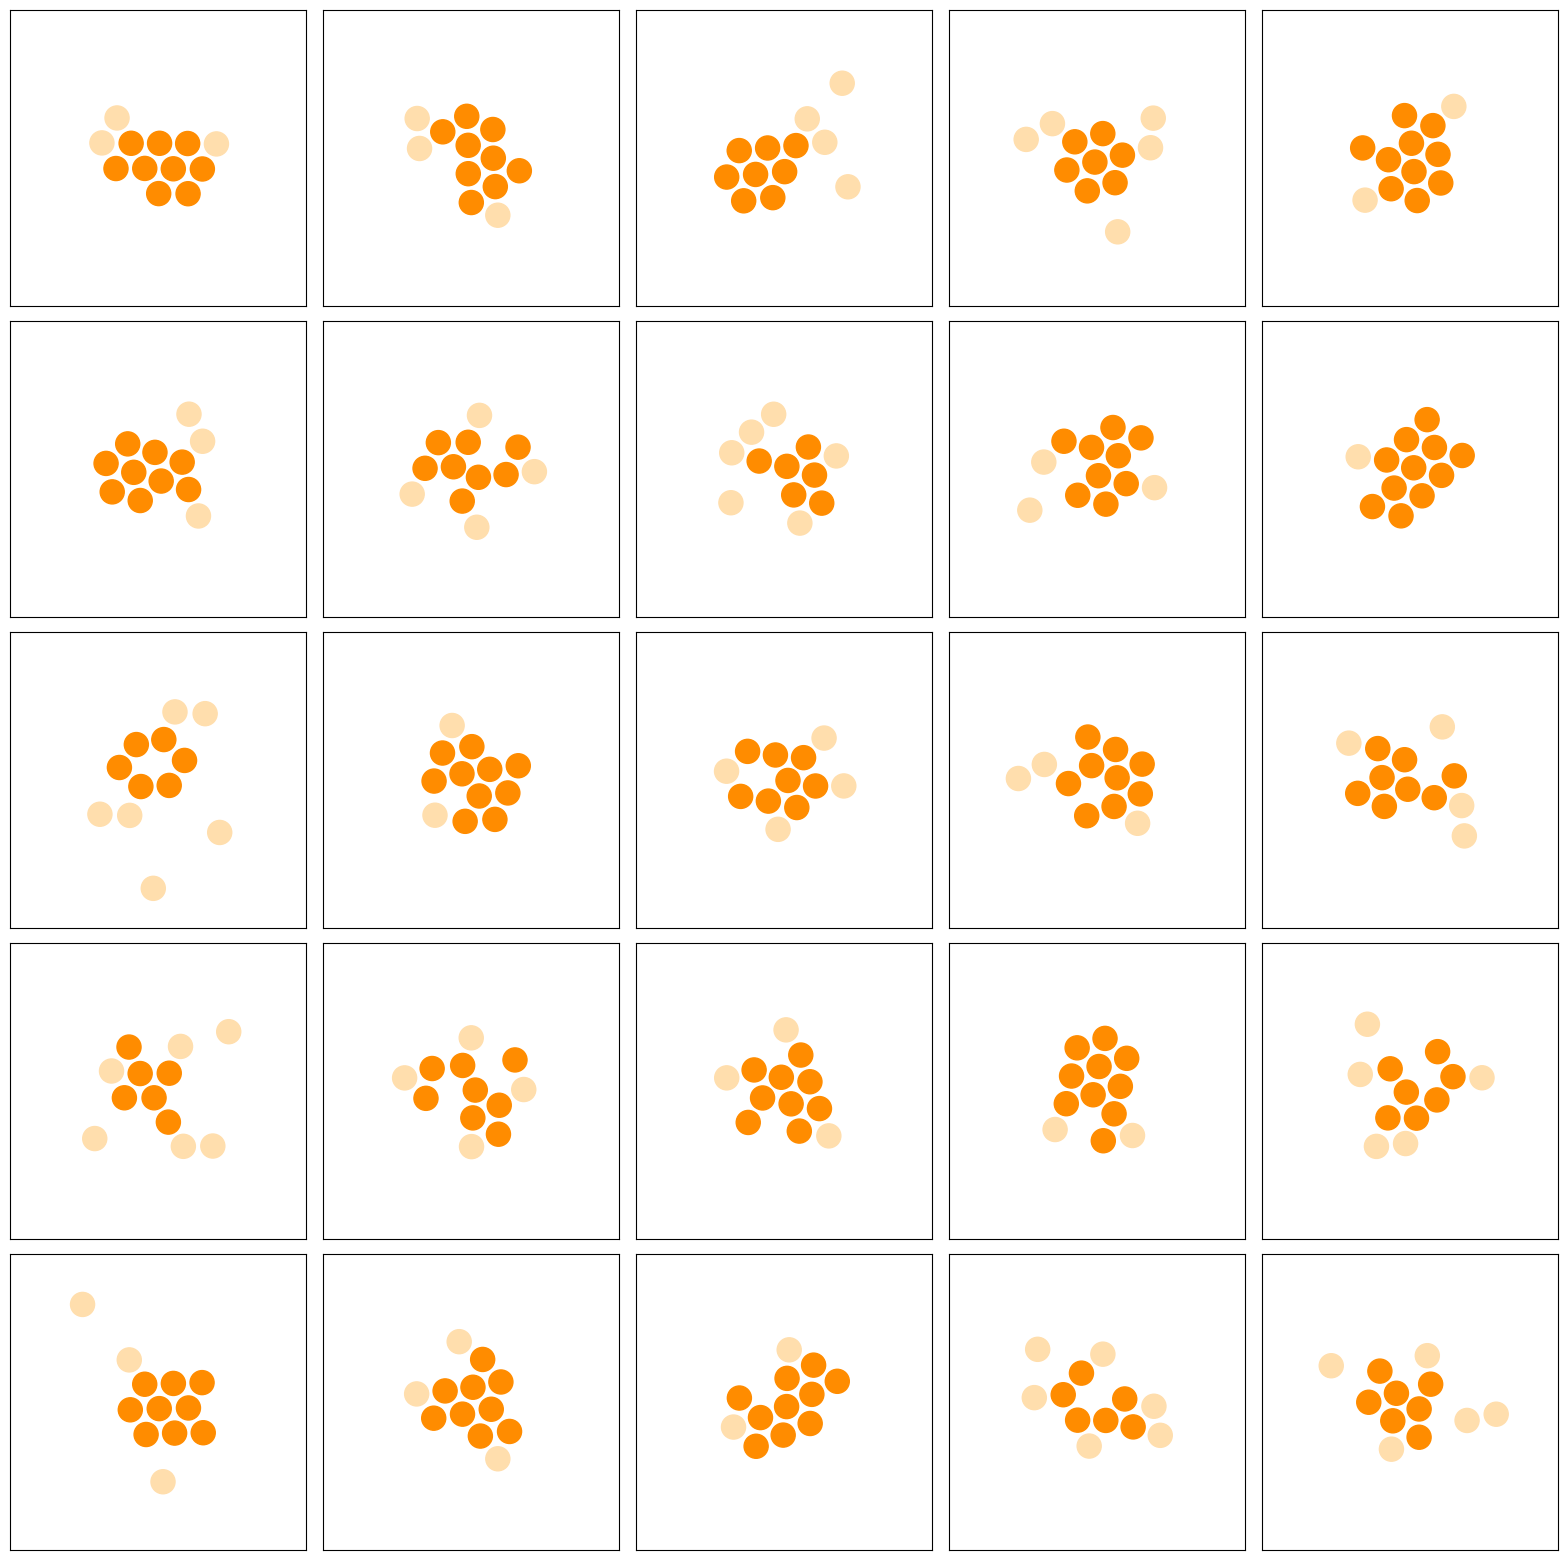

In [70]:
fig, axs = plt.subplots(5,5, figsize=(20,20), gridspec_kw={'wspace':0.05, 'hspace':0.05})

for i, ax in enumerate(axs.flatten()):
    draw_molecule(ax,positions[i + 10],labels[i + 10])
    ax.set(xlim=(-5,5),ylim=(-5,5),aspect='equal', xticks=[], yticks=[])

save_plot(fig, 'molecules_with_outer_atoms.png')

In [60]:
def atomic_fingerprint(positions, cutoff=7.0, n=32, sigma=0.3, index = None):

    if isinstance(positions, np.ndarray):
        positions = torch.tensor(positions, dtype=torch.float32)

    if index is None:
        R = torch.cdist(positions, positions).reshape(len(positions), len(positions), 1)

    else:
        R = torch.cdist(positions, positions[index].reshape(1,-1)).reshape(len(positions), 1)


    r0 = torch.linspace(0, cutoff, n).reshape(1,1, n)
    z = np.exp(- 0.5 * ((R - r0) / sigma) ** 2) * torch.cos(np.pi/2 * r0/cutoff) * (r0 < cutoff)
    

    return z.sum(dim=0)


def fingerprints(positions):
    return torch.vstack([atomic_fingerprint(p) for p in positions])

In [77]:
atomic_fingerprint(positions[0])

tensor([[1.0093e+00, 8.3437e-01, 7.3287e-01, 1.2627e+00, 2.0311e+00, 2.4210e+00,
         3.0354e+00, 4.2363e+00, 4.7369e+00, 4.0915e+00, 3.3218e+00, 2.6051e+00,
         1.6675e+00, 1.0041e+00, 8.4284e-01, 6.8921e-01, 3.5978e-01, 1.0803e-01,
         1.8346e-02, 1.7567e-03, 9.4716e-05, 2.8714e-06, 4.8862e-08, 4.6561e-10,
         2.4763e-12, 7.3146e-15, 1.1910e-17, 1.0556e-20, 4.9734e-24, 1.1809e-27,
         1.1924e-31, 0.0000e+00],
        [1.0000e+00, 7.5235e-01, 3.2039e-01, 7.7227e-02, 1.0584e-02, 1.8423e-03,
         1.2415e-02, 8.4319e-02, 3.2559e-01, 7.2038e-01, 9.7667e-01, 1.1102e+00,
         1.6869e+00, 2.6315e+00, 3.0052e+00, 2.5792e+00, 2.1152e+00, 2.0268e+00,
         2.0066e+00, 1.7031e+00, 1.2095e+00, 8.1304e-01, 6.0705e-01, 4.5910e-01,
         2.5577e-01, 8.6184e-02, 1.6370e-02, 1.7022e-03, 9.4212e-05, 2.6290e-06,
         3.1201e-08, 0.0000e+00],
        [1.0279e+00, 9.8941e-01, 1.4611e+00, 3.1971e+00, 4.9366e+00, 4.8649e+00,
         4.0134e+00, 3.8437e+00, 3.3773e+

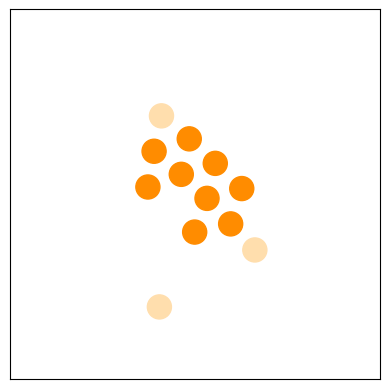

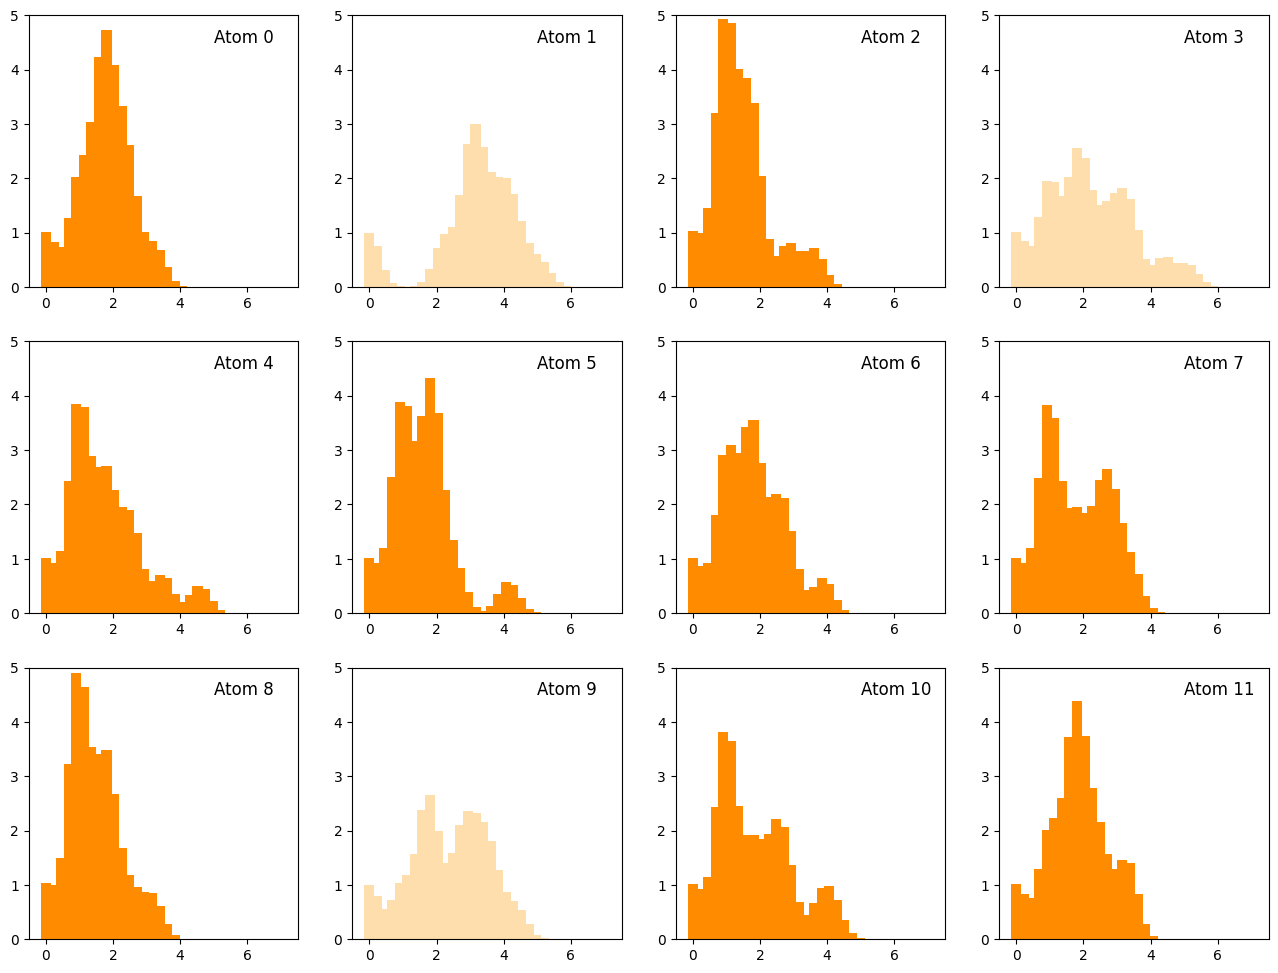

In [86]:
fig, ax = plt.subplots()

draw_molecule(ax,positions[0],labels[0])

fig, axs = plt.subplots(3,4, figsize=(16,12), gridspec_kw={'wspace':0.2, 'hspace':0.2})

for ax, fingerprint, label, i in zip(axs.flatten(), atomic_fingerprint(positions[0]), labels[0], range(12)):
    #Make bar plot of fingerprint with 32 bars between 0 and 7
    color = 'navajowhite' if label else 'darkorange'
    ax.bar(np.linspace(0,7,32), fingerprint, width=0.3, color=color)
    ax.set(ylim=(0,5))
    ax.text(5,4.5,f'Atom {i}', fontsize=12)

In [87]:
def test_train_val_split(data, labels, test_size=0.1, val_size=0.1):
    n = len(data)
    indices = np.random.permutation(n)

    test_indices = indices[:int(n * test_size)]
    val_indices = indices[int(n * test_size):int(n * (test_size + val_size))]
    train_indices = indices[int(n * (test_size + val_size)):]

    
    return data[train_indices], labels[train_indices], data[val_indices], labels[val_indices], data[test_indices], labels[test_indices]


train, train_labels, val, val_labels, test, test_labels = test_train_val_split(positions, labels)

In [102]:
X_train = fingerprints(train)
y_train = torch.tensor(train_labels.flatten(), dtype=torch.long)
X_val = fingerprints(val)
y_val = torch.tensor(val_labels.flatten(), dtype=torch.long)
X_test = fingerprints(test)
y_test = torch.tensor(test_labels.flatten(), dtype=torch.long)

In [103]:
X_train.shape

torch.Size([9600, 32])

In [104]:
from torch.utils.data import TensorDataset, DataLoader

dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataset_val = TensorDataset(X_val, y_val)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=False)
dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)

In [118]:
class LabelModelShallow(torch.nn.Module):
    def __init__(self, n_features=12, n_classes=2, n_hidden = 4,loss_function = torch.nn.CrossEntropyLoss()):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_features, n_classes, bias=True)
        self.n_features = n_features
        self.n_classes = n_classes
        self.fc1 = torch.nn.Linear(n_features, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_classes)
        self.loss_function = loss_function
        self.activation = torch.nn.SiLU()
        
    def forward(self,x):
        
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)

        return x

    def predict_label(self, x):

        predicted_label = torch.argmax(self(x), dim=1)
        return predicted_label


    def fit(self, data_list, labels_list, epochs=1000, lr=0.01):
        criterion = torch.nn.CrossEntropyLoss()
        n_epochs = 1000
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        for epoch in range(epochs):
            optimizer.zero_grad()
            predicted_weights = self(data_list)
            labels = torch.tensor(labels_list, dtype = int)
            loss = criterion(predicted_weights, labels)
            loss.backward()
            optimizer.step()

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, loss: {loss.item()}')

        print('Optimization finished with loss: ', loss.item(), '\n') 

    
    def fit_loader(self, training_loader, validation_loader, epochs=1000, lr=0.01, optimizer = torch.optim.SGD, patience = 5, **kwargs):
        self.train_loss = []
        self.val_loss = []

        
        early_stopper = EarlyStopping(patience)

        optimizer = optimizer(self.parameters(), lr=lr, **kwargs)
        loss_function = self.loss_function

        for epoch in range(epochs):
            self.train()
            train_loss = 0.0
            for batch_of_data in training_loader:
                optimizer.zero_grad()
                outputs = self(batch_of_data[0])
                loss = self.loss_function(outputs, batch_of_data[1])
                loss.backward()
                optimizer.step()
                with torch.no_grad():
                    train_loss += loss.item() * batch_of_data[0].size(0) 
            
            train_loss /= len(training_loader.dataset) 

            # Evaluation step
            self.eval()
            val_loss = 0.0
            for batch_of_data in validation_loader:
                with torch.no_grad():
                    outputs = self(batch_of_data[0])
                    val_loss += loss_function(outputs, batch_of_data[1]).item() * batch_of_data[0].size(0) 
            val_loss /= len(validation_loader.dataset)
            if early_stopper is not None:
                early_stopper(val_loss)
                if early_stopper.early_stop:
                    break
            
            if epoch % 250 == 0:
                print(f'Epoch {epoch} \n Training loss: {train_loss} \n Validation loss: {val_loss}')
            
                
            self.train_loss.append(train_loss)
            self.val_loss.append(val_loss)

        print('Optimization finished with loss: ', val_loss, '\n')

class LabelModelDeep(torch.nn.Module):
    def __init__(self, n_features=12, n_classes=2, n_hidden = 20,loss_function = torch.nn.CrossEntropyLoss()):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_features, n_classes, bias=True)
        self.n_features = n_features
        self.n_classes = n_classes
        self.fc1 = torch.nn.Linear(n_features, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_hidden)
        self.fc3 = torch.nn.Linear(n_hidden, n_classes)
        self.loss_function = loss_function
        self.activation = torch.nn.SiLU()
        
    def forward(self,x):
        #x = x.view(-1, self.n_features)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        return x

    def predict_label(self, x):

        predicted_label = torch.argmax(self(x), dim=1)
        return predicted_label


    def fit(self, data_list, labels_list, epochs=1000, lr=0.01):
        criterion = torch.nn.CrossEntropyLoss()
        n_epochs = 1000
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        for epoch in range(epochs):
            optimizer.zero_grad()
            predicted_weights = self(data_list)
            labels = torch.tensor(labels_list, dtype = int)
            loss = criterion(predicted_weights, labels)
            loss.backward()
            optimizer.step()

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, loss: {loss.item()}')

        print('Optimization finished with loss: ', loss.item(), '\n') 

    
    def fit_loader(self, training_loader, validation_loader, epochs=1000, lr=0.01, optimizer = torch.optim.SGD, patience = 5, **kwargs):
        self.train_loss = []
        self.val_loss = []

        
        early_stopper = EarlyStopping(patience)

        optimizer = optimizer(self.parameters(), lr=lr, **kwargs)
        loss_function = self.loss_function

        for epoch in range(epochs):
            self.train()
            train_loss = 0.0
            for batch_of_data in training_loader:
                optimizer.zero_grad()
                outputs = self(batch_of_data[0])
                loss = self.loss_function(outputs, batch_of_data[1])
                loss.backward()
                optimizer.step()
                with torch.no_grad():
                    train_loss += loss.item() * batch_of_data[0].size(0) 
            
            train_loss /= len(training_loader.dataset) 

            # Evaluation step
            self.eval()
            val_loss = 0.0
            for batch_of_data in validation_loader:
                with torch.no_grad():
                    outputs = self(batch_of_data[0])
                    val_loss += loss_function(outputs, batch_of_data[1]).item() * batch_of_data[0].size(0) 
            val_loss /= len(validation_loader.dataset)
            if early_stopper is not None:
                early_stopper(val_loss)
                if early_stopper.early_stop:
                    break
            
            if epoch % 250 == 0:
                print(f'Epoch {epoch} \n Training loss: {train_loss} \n Validation loss: {val_loss}')
            
                
            self.train_loss.append(train_loss)
            self.val_loss.append(val_loss)

        print('Optimization finished with loss: ', val_loss, '\n')

In [119]:
LMShallow = LabelModelShallow(n_features=32)

LMShallow.fit_loader(dataloader_train, dataloader_val, optimizer= torch.optim.Adam,epochs=1000, lr=0.001, patience=50)

Epoch 0 
 Training loss: 0.3443491547554731 
 Validation loss: 0.17604755441347758
Epoch 250 
 Training loss: 0.03693188887389018 
 Validation loss: 0.04212582530919463
Optimization finished with loss:  0.04530415126976246 



In [120]:
LMDeep = LabelModelDeep(n_features=32)

LMDeep.fit_loader(dataloader_train, dataloader_val, optimizer= torch.optim.Adam,epochs=1000, lr=0.001, patience=50)

Epoch 0 
 Training loss: 0.1978404076490551 
 Validation loss: 0.085655946880579
Optimization finished with loss:  0.05606131677011338 



AttributeError: 'numpy.ndarray' object has no attribute 'plot'

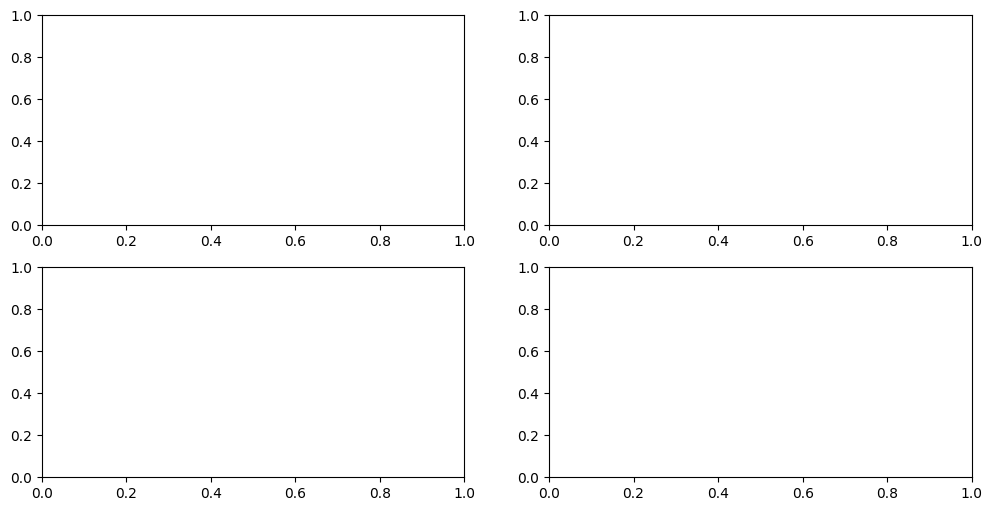

In [130]:
shallow_predictions = LMShallow.predict_label(X_test)

shallow_correct = 0
shallow_remove_error = 0
shallow_keep_error = 0
for i in range(len(shallow_predictions)):
    if shallow_predictions[i] == y_test[i]:
        shallow_correct += 1
    elif y_test[i] == 0:
        shallow_remove_error += 1
    else:
        shallow_keep_error += 1


deep_predictions = LMDeep.predict_label(X_test)

deep_correct = 0
deep_remove_error = 0
deep_keep_error = 0

for i in range(len(deep_predictions)):
    if deep_predictions[i] == y_test[i]:
        deep_correct += 1
    elif y_test[i] == 0:
        deep_remove_error += 1
    else:
        deep_keep_error += 1

print(f'Shallow model accuracy: {shallow_correct/len(y_test)} \n Deep model accuracy: {deep_correct/len(y_test)}')





Shallow model accuracy: 0.9808333333333333 
 Deep model accuracy: 0.9808333333333333


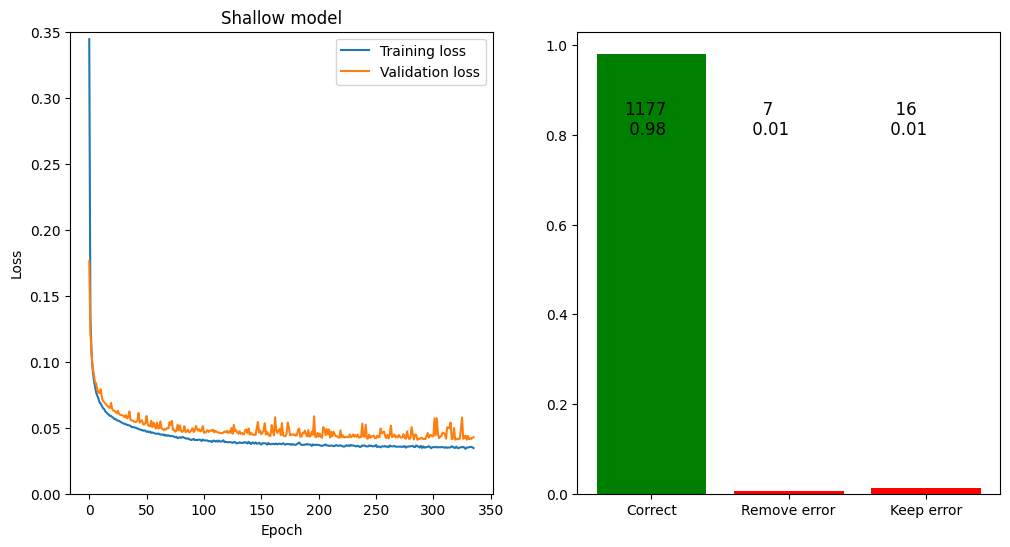

In [148]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(LMShallow.train_loss, label='Training loss')
ax[0].plot(LMShallow.val_loss, label='Validation loss')
ax[0].set(xlabel='Epoch', ylabel='Loss', title='Shallow model', ylim=(0,0.35))
ax[0].legend()

ax[1].bar(['Correct', 'Remove error', 'Keep error'], np.array([shallow_correct, shallow_remove_error, shallow_keep_error])/len(y_test), color=['green', 'red', 'red'])
ax[1].text(-0.2,0.8,f'{shallow_correct}\n {shallow_correct/len(y_test):.2f}', fontsize=12)
ax[1].text(0.7,0.8,f'   {shallow_remove_error:}\n {shallow_remove_error/len(y_test):.2f}', fontsize=12)
ax[1].text(1.7,0.8,f'  {shallow_keep_error}\n {shallow_keep_error/len(y_test):.2f}', fontsize=12)

save_plot(fig, 'shallow_model_performance.png')

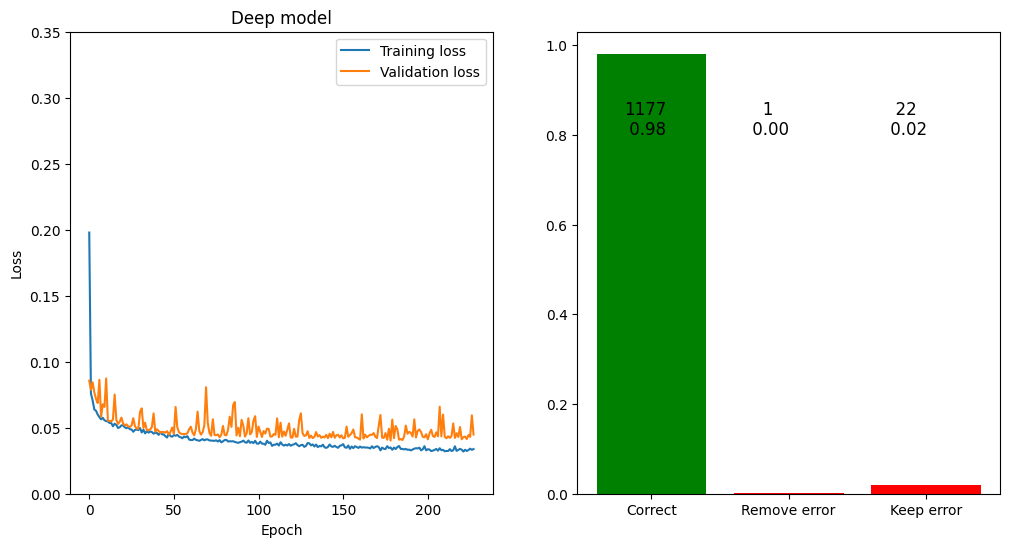

In [149]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(LMDeep.train_loss, label='Training loss')
ax[0].plot(LMDeep.val_loss, label='Validation loss')
ax[0].set(xlabel='Epoch', ylabel='Loss', title='Deep model', ylim=(0,0.35))
ax[0].legend()

ax[1].bar(['Correct', 'Remove error', 'Keep error'], np.array([deep_correct, deep_remove_error, deep_keep_error])/len(y_test), color=['green', 'red', 'red'])
ax[1].text(-0.2,0.8,f'{deep_correct}\n {deep_correct/len(y_test):.2f}', fontsize=12)
ax[1].text(0.7,0.8,f'   {deep_remove_error:}\n {deep_remove_error/len(y_test):.2f}', fontsize=12)
ax[1].text(1.7,0.8,f'  {deep_keep_error}\n {deep_keep_error/len(y_test):.2f}', fontsize=12)


save_plot(fig, 'deep_model_performance.png')

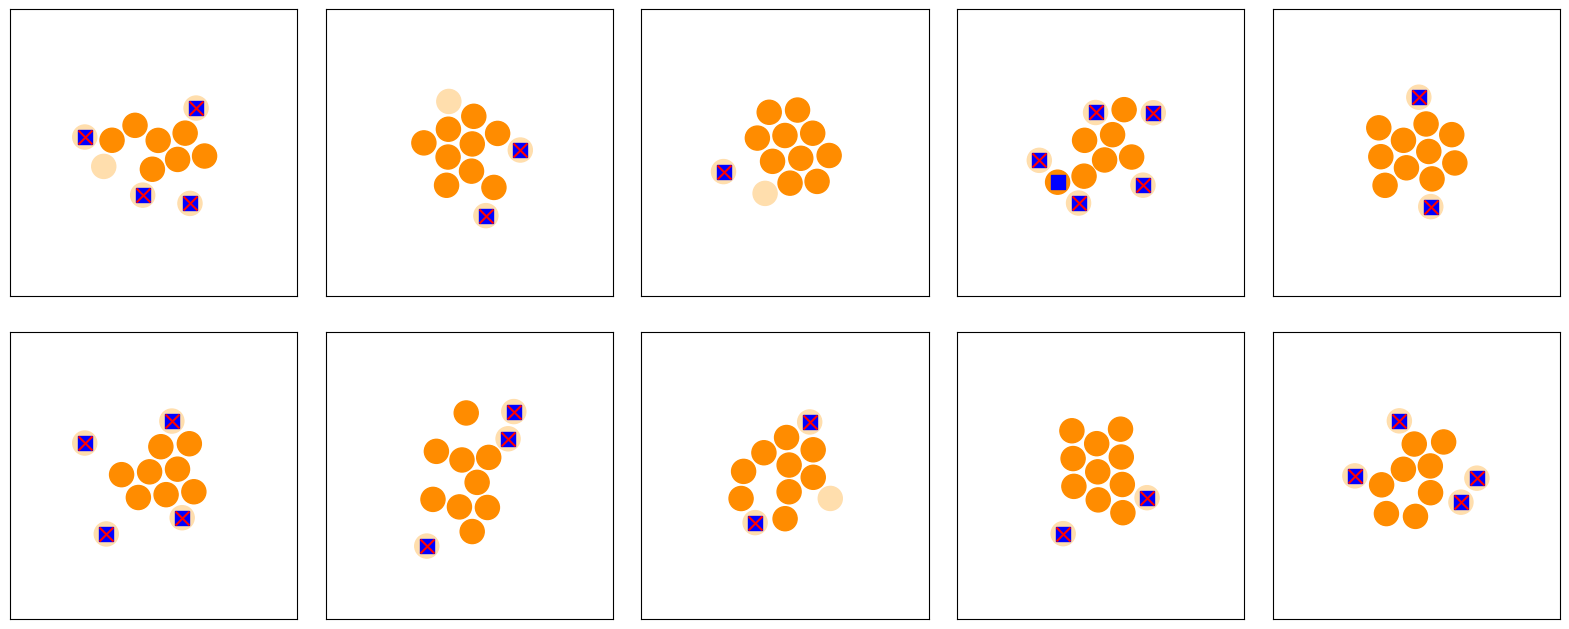

In [168]:

fig, axs = plt.subplots(2,5, figsize=(20,8), gridspec_kw={'wspace':0.1, 'hspace':0.1})

for ax in axs.flatten():
    i = np.random.randint(len(test))
    draw_molecule(ax,test[i],test_labels[i])
    ax.set(xlim=(-5,5),ylim=(-5,5),aspect='equal', xticks=[], yticks=[])
    fingerprint = atomic_fingerprint(test[i])
    predicted_label_shallow = LMShallow.predict_label(fingerprint)
    predicted_label_deep = LMDeep.predict_label(fingerprint)

    #Plot an x over the atom if the model would remove it
    for k, label in enumerate(predicted_label_shallow):
        if label == 1:
            ax.scatter(test[i][k,0],test[i][k,1], marker = 's', color='blue', s=100, label = 'Shallow model prediction')

    for j, label in enumerate(predicted_label_deep):
        if label == 1:
            ax.scatter(test[i][j,0],test[i][j,1], marker = 'x', color='red', s=100, label = 'Deep model prediction')

    
    
    
    

In [169]:
save_plot(fig, 'molecules_with_predictions.png')